In [80]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.decomposition import PCA

%matplotlib notebook
plt.style.use('ggplot')

In [33]:
file = "data/cardio_clean_clustering_IMC.csv"


In [38]:
#dataframe = pd.read_csv(file)
dataframe = pd.read_csv(file, usecols={'age','BMI', 'gender', 'TIEMPO','mGy','pGym','IMÁGENES','CUADROS POR SEGUNDO','PULSOS POR SEGUNDO', 'CONTRASTE'})
print(len(dataframe))
dataframe.head()

593


,gender,age,BMI,TIEMPO,mGy,pGym,IMÁGENES,CUADROS POR SEGUNDO,PULSOS POR SEGUNDO,CONTRASTE
0,0,75,28.125000,3.25,85.0,4209.9,3,7.5,15.0,0
1,0,49,27.600000,7.60,1301.0,8858.6,18,7.5,15.0,120
2,1,78,24.034610,10.04,128.0,6979.5,5,7.5,15.0,0
3,0,48,39.792388,30.60,1906.0,22416.8,13,7.5,15.0,230
4,1,81,25.826446,2.45,206.0,1026.5,11,7.5,15.0,100


In [39]:
type(dataframe)
dataframe.isin(['NaN']).any()

gender                 False
age                    False
BMI                    False
TIEMPO                 False
mGy                    False
pGym                   False
IMÁGENES               False
CUADROS POR SEGUNDO    False
PULSOS POR SEGUNDO     False
CONTRASTE              False
dtype: bool

In [40]:
data_vals = dataframe.values
len(data_vals)

593

In [44]:
pca = PCA(n_components=3)
pca.fit(data_vals)
data_val = pca.transform(data_vals)
for element in data_val:
    print(element)

[-1407.60305863   524.99327608    41.95602001]
[3364.15305358  -51.795144      5.26371889]
[1342.04695044  859.47804289   49.46712883]
[16879.36169506  1189.23300309   -42.64635668]
[-4543.89908588   -34.29302909   -56.0481567 ]
[-2788.03274786    97.4951384    -11.68953087]
[-4068.99107851    51.25916244    -6.94156857]
[-4347.96168251   183.28384339    33.04197866]
[3284.87518128 1102.38242088   54.06450408]
[-981.55374141 -329.19901404 -172.45732695]
[2922.71551338  -83.81487819  -67.53017744]
[-331.22561984  656.7688151    44.78029127]
[-628.6852456    29.00125944  -39.68571375]
[ 4.80040177e+03  1.49057721e+02 -2.24685017e+00]
[-460.59801284  -19.00228513   34.45461029]
[-529.78867708  -26.28810949    4.27958131]
[-271.70678759  668.0534861    44.71029799]
[-3498.30553996    95.04744191   -26.11978625]
[-3703.73946271    61.71432704   -44.36291264]
[-2711.67752109    85.80653837    -7.50701791]
[  95.27530348 -232.55494229 -148.33379608]
[9944.02424347  233.5269366   -15.16511765]

In [46]:
print(pca.score(data_val))
print(pca.components_)
print(pca.explained_variance_)

-23.027089261405827
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  1.00000000e+00 -1.66533454e-16]
 [ 0.00000000e+00  1.11022302e-16  1.00000000e+00]]
[2.71593260e+07 1.74999228e+05 4.25495073e+03]


In [47]:
principalDf = pd.DataFrame(data = data_vals,
             columns = ['principal component 1', 'principal component 2',  'principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,-1407.603059,524.993276,41.956020
1,3364.153054,-51.795144,5.263719
2,1342.046950,859.478043,49.467129
3,16879.361695,1189.233003,-42.646357
4,-4543.899086,-34.293029,-56.048157
...,...,...,...
588,15468.428629,1224.991262,21.096640
589,-3255.986039,-81.569482,-35.307045
590,-2766.501981,-458.636225,-137.466392
591,-1822.897146,99.984271,-67.077311


In [56]:
n_samples = data_val.shape[0]
# We center the data and compute the sample covariance matrix.
X_centered = data_val - np.mean(data_val, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

27113526.105674434
27159325.980852928
174704.11956510626
174999.22787518246
4247.775431084547
4254.95072742084


In [58]:
#kmeans2 = KMeans(n_clusters=2, random_state=0).fit(nparray)
leng = len(data_val)
print(np.min(data_val), np.max(data_val))
print(np.shape(data_val))
#plt.scatter(nparray)

-5535.809489115378 28484.273722494265
(593, 3)


<IPython.core.display.Javascript object>


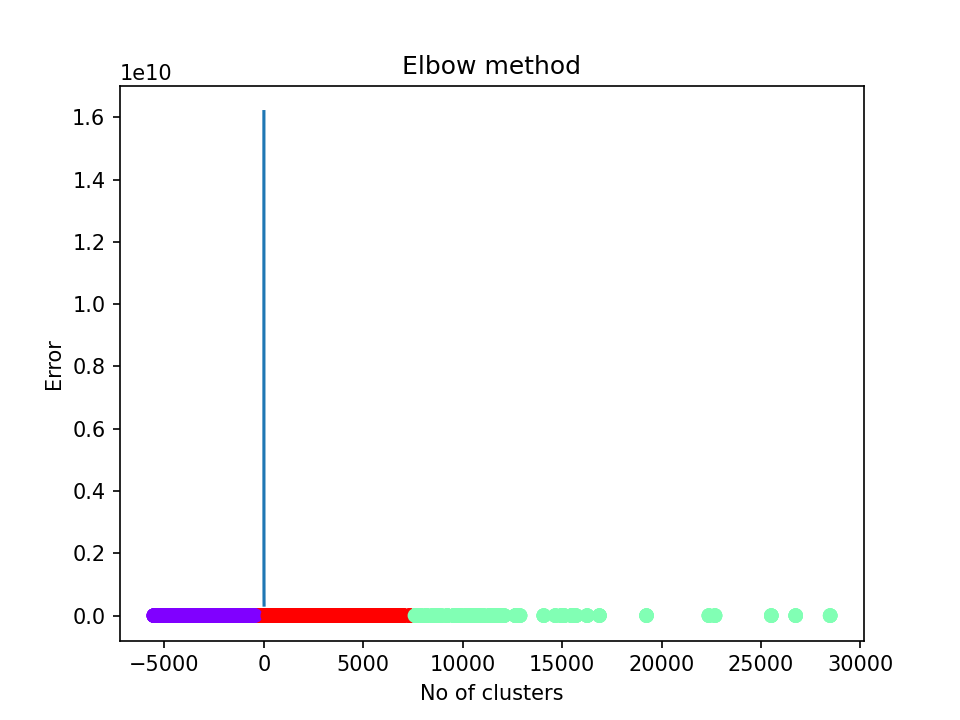

In [59]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(data_val)
    kmeans.fit(data_vals)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [76]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(data_val)
print(y_kmeans)

kmeans.cluster_centers_

[1 2 2 3 1 1 1 1 2 2 2 2 2 0 2 2 2 1 1 1 2 0 0 2 2 0 1 2 0 0 1 1 0 0 1 2 0
 0 1 2 2 1 1 0 2 0 0 1 1 2 2 1 2 1 1 1 2 2 1 1 1 1 2 1 2 0 2 0 2 2 0 1 1 0
 0 1 2 1 2 1 1 1 1 2 0 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 0 1 1 2 0 1 1 1
 1 1 1 1 1 1 2 2 2 2 1 2 1 2 1 3 1 0 1 1 0 1 1 1 0 0 1 1 2 1 0 1 1 1 2 1 1
 1 1 2 2 2 1 2 1 0 1 1 0 1 2 0 0 0 1 2 0 0 1 2 1 1 1 0 3 2 1 2 2 0 0 1 2 2
 2 1 2 1 1 1 1 1 0 1 1 1 3 1 2 2 2 0 1 1 2 1 3 0 1 2 2 1 3 1 1 0 1 1 2 2 2
 1 1 0 2 1 1 1 2 1 1 1 0 1 2 1 0 1 2 1 0 2 1 1 2 1 1 1 1 1 1 1 1 1 2 0 2 2
 1 1 1 1 2 2 2 2 2 1 0 2 1 1 1 2 2 2 2 0 1 2 1 1 1 2 0 2 2 1 1 1 1 1 3 1 2
 1 1 1 2 0 0 1 1 2 1 1 2 1 2 1 2 0 0 2 0 1 1 2 0 2 1 1 1 1 0 1 1 1 1 0 1 1
 0 1 2 1 2 3 1 1 1 1 1 0 1 1 2 2 1 1 1 2 1 0 1 1 1 2 2 1 1 1 2 1 0 1 1 0 1
 0 0 1 1 1 1 0 2 1 1 1 1 1 3 1 1 1 2 1 1 3 1 1 1 2 0 1 1 1 0 1 1 2 2 1 1 2
 2 2 2 1 1 0 1 2 0 0 1 2 2 2 1 0 2 1 2 0 2 1 1 1 1 0 1 2 0 2 2 1 1 1 1 1 2
 1 1 1 2 0 2 0 1 1 0 1 3 2 3 0 1 2 2 1 2 1 1 1 1 2 0 3 2 1 2 0 2 2 0 1 0 1
 1 1 1 1 2 1 1 2 2 1 0 2 

array([[ 7.54712098e+03, -1.42905766e+02,  1.00445251e+01],
       [-3.46238176e+03,  2.85645692e+01,  1.49160201e+00],
       [ 8.26631830e+02, -9.59997439e+00, -9.38650249e+00],
       [ 1.89133717e+04,  3.54322690e+02,  1.65118573e+01]])

In [77]:
for i, item in enumerate(kmeans.cluster_centers_):
    print("Centro del centroide No {} es: \n {} \n".format(i+1, item))

Centro del centroide No 1 es: 
 [7547.12098036 -142.9057661    10.04452508] 

Centro del centroide No 2 es: 
 [-3.46238176e+03  2.85645692e+01  1.49160201e+00] 

Centro del centroide No 3 es: 
 [826.63183045  -9.59997439  -9.38650249] 

Centro del centroide No 4 es: 
 [1.89133717e+04 3.54322690e+02 1.65118573e+01] 



In [78]:
plt.scatter(data_val[:,0],data_val[:,1],c=y_kmeans,cmap='rainbow') 

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

<IPython.core.display.Javascript object>


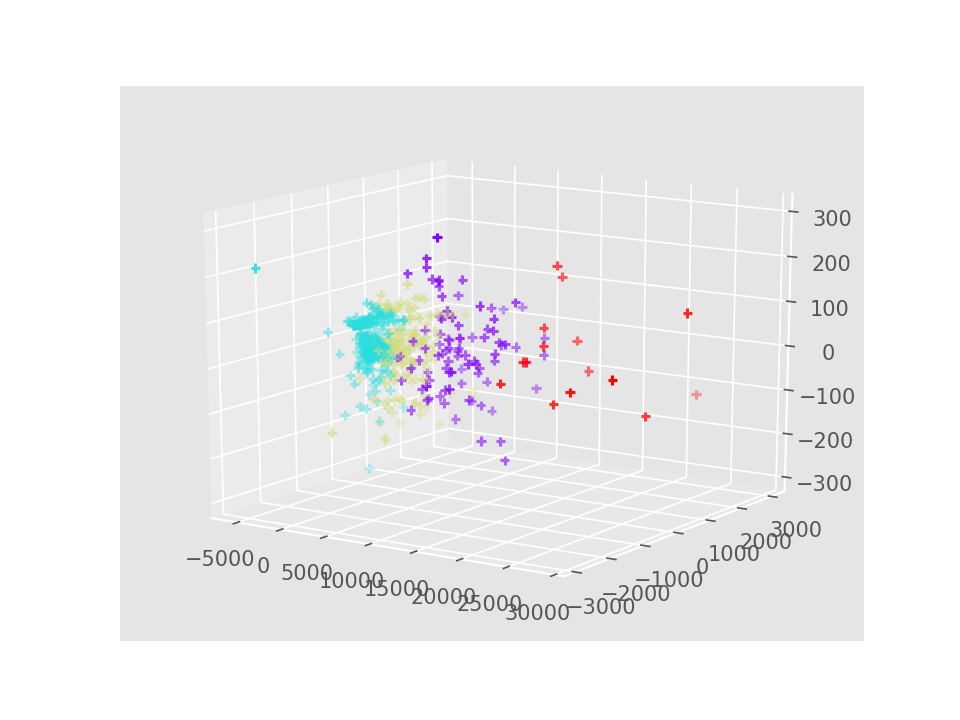

In [81]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_val[:,0],data_val[:,1], data_val[:,2], marker='+', c=y_kmeans, cmap='rainbow')
plt.savefig("PCA")